# Communal Conflict model in Ethiopia
## Ethiopia, admin2, monthly data
### 1. Random Forest Classifier 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [34]:
#os.chdir('/home/ubuntu/darpa/models/conflict_probability')

In [35]:
#url = 'https://data.kimetrica.com/dataset/4dbc3cc7-9474-49f2-bfd4-231e78401caa/resource/7423b71d-ce8c-437c-9fe6-2d9ba58d6155/download/dataset_communal_cnflict_model.csv'
df = pd.read_csv('/Users/yaredhurisa/Google Drive/Probability of conflict/indicators/eth_cc_final_dataset_monthly.csv')
list(df.columns)

['Unnamed: 0',
 'group',
 'date',
 'cc_onset',
 'fatalities',
 'cc_onset_1',
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
 'cc_onset_2',
 'fatalities_2',
 'actor_state_2',
 'actor_rebel_groups_2',
 'actor_political_militias_2',
 'actor_identity_militias_2',
 'actor_civilians_2',
 'actor_others_2',
 'inflation_all_2',
 'rainfall_2',
 'temperature_2',
 'pop_2',
 'maize_kg_birr_2',
 'teff_kg_birr_2',
 'wheat_kg_birr_2',
 'ndvi_2',
 'fs_crisis_2',
 'df_emergency_2',
 'fs_famine_2',
 'fs_minimal_2',
 'fs_stressed_2',
 'cc_onset_3',
 'fatalities_3',
 'actor_state_3',
 'actor_rebel_groups_3',
 'actor_political_militias_3',
 'actor_identity_militias_3',
 'actor_ci

In [36]:
df=df.drop(['cc_onset'], axis=1)

In [37]:
#Training, and test 
start_date = "2009-12-01"
end_date = "2018-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
train1 = df.loc[mask]


start_date = "2017-12-01"
end_date = "2019-01-01"
mask = (df['date'] > start_date) & (df['date'] < end_date)
test1 = df.loc[mask]


In [38]:
train1.head()

,Unnamed: 0,group,date,fatalities,cc_onset_1,fatalities_1,actor_state_1,actor_rebel_groups_1,actor_political_militias_1,actor_identity_militias_1,...,pop_12,maize_kg_birr_12,teff_kg_birr_12,wheat_kg_birr_12,ndvi_12,fs_crisis_12,df_emergency_12,fs_famine_12,fs_minimal_12,fs_stressed_12
12,13,Addis Ababa_Addis Ababa,2010-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3089964.0,5.890955,8.229426,7.361024,132.890436,0.0,0.0,0.0,0.0,0.0
13,14,Addis Ababa_Addis Ababa,2011-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3177713.0,4.164861,8.292023,6.580821,134.059167,0.0,0.0,0.0,0.0,0.0
14,15,Addis Ababa_Addis Ababa,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3268409.0,3.736111,7.441661,6.789736,132.349538,0.0,0.0,0.0,0.0,0.0
15,16,Addis Ababa_Addis Ababa,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3362496.0,5.031727,6.632678,4.931552,128.659290,0.0,0.0,0.0,0.0,0.0
16,17,Addis Ababa_Addis Ababa,2014-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3460484.0,6.517361,13.442138,10.858605,128.996890,0.0,0.0,0.0,0.0,0.0


In [39]:
X= df[[
    'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',
  ]]

In [40]:
y = df['fatalities']

In [41]:
X_train = train1[[
 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',]]

In [42]:
y_train = train1['fatalities']

In [43]:
y_test = test1['fatalities']

In [44]:
X_test = test1[[ 'fatalities_1',
 'actor_state_1',
 'actor_rebel_groups_1',
 'actor_political_militias_1',
 'actor_identity_militias_1',
 'actor_civilians_1',
 'actor_others_1',
 'inflation_all_1',
 'rainfall_1',
 'temperature_1',
 'pop_1',
 'maize_kg_birr_1',
 'teff_kg_birr_1',
 'wheat_kg_birr_1',
 'ndvi_1',
 'fs_crisis_1',
 'df_emergency_1',
 'fs_famine_1',
 'fs_minimal_1',
 'fs_stressed_1',]]

# Visualize the data distribution

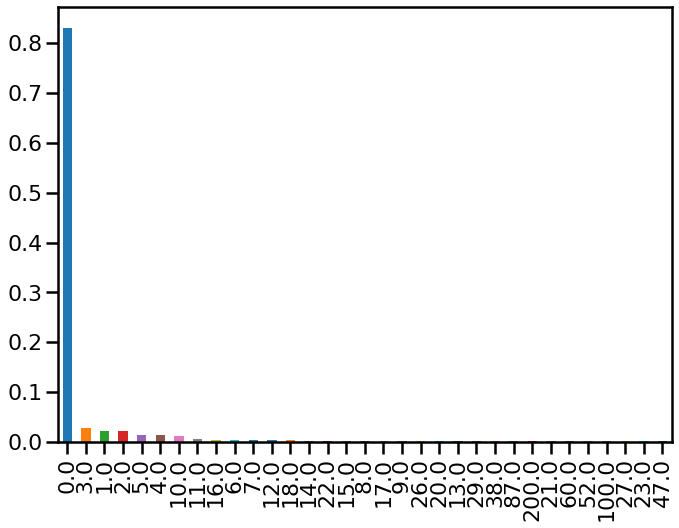

In [45]:
break_down = y_test.value_counts(normalize=True)
break_down.plot(kind='bar')
plt.show()
#ax = train['fatalities'].plot.bar(rot=0)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from merf import MERF
merf = MERF()

In [47]:
# Z_train is the design matrix
Z_train = np.ones((len(X_train), 1))
clusters_train = train1['group']
y_train = train1['fatalities']

In [48]:
mrf = MERF(n_estimators=100, max_iterations=100)
merf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:250] GLL is 38985.585859746774 at iteration 1.
INFO     [merf.py:250] GLL is 39058.11016956574 at iteration 2.
INFO     [merf.py:250] GLL is 38841.649302512546 at iteration 3.
INFO     [merf.py:250] GLL is 38943.53269775655 at iteration 4.
INFO     [merf.py:250] GLL is 38901.69404169884 at iteration 5.
INFO     [merf.py:250] GLL is 39012.04678829103 at iteration 6.
INFO     [merf.py:250] GLL is 39052.86041877028 at iteration 7.
INFO     [merf.py:250] GLL is 39006.212348673456 at iteration 8.
INFO     [merf.py:250] GLL is 39015.92970195692 at iteration 9.
INFO     [merf.py:250] GLL is 38975.25055797236 at iteration 10.
INFO     [merf.py:250] GLL is 38955.85155527144 at iteration 11.
INFO     [merf.py:250] GLL is 39040.4191124297 at iteration 12.
INFO     [merf.py:250] GLL is 38879.86642447355 at iteration 13.
INFO     [merf.py:250] GLL is 38976.452009652996 at iteration 14.
INFO     [merf.py:250] GLL is 38818.32263955926 at iteration 15.
INFO     [merf.py:250] GLL is 3

Text(0.5, 0, 'Iteration')

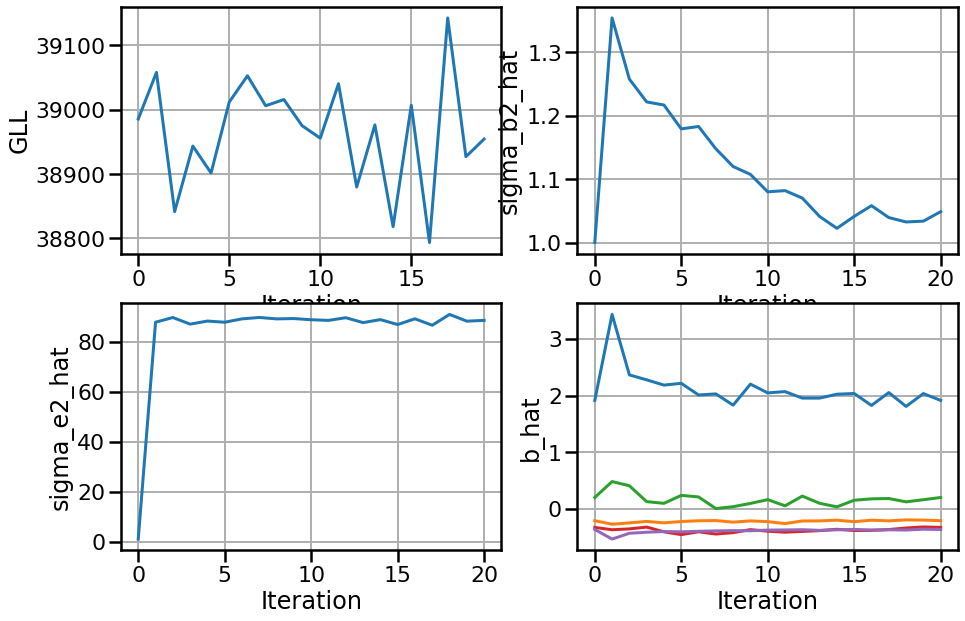

In [49]:
plt.figure(figsize=[15,10])
plt.subplot(221)
plt.plot(merf.gll_history)
plt.grid('on')
plt.ylabel('GLL')
plt.xlabel('Iteration')

plt.subplot(222)
D_hat_history = [x[0][0] for x in merf.D_hat_history]
plt.plot(D_hat_history)
plt.grid('on')
plt.ylabel('sigma_b2_hat')
plt.xlabel('Iteration')

plt.subplot(223)
plt.plot(merf.sigma2_hat_history)
plt.grid('on')
plt.ylabel('sigma_e2_hat')
plt.xlabel('Iteration')

plt.subplot(224)
b_df = pd.concat(merf.b_hat_history, axis=1)

b_df.columns = range(0, 21)


plt.plot(b_df.iloc[0])
plt.plot(b_df.iloc[20])
plt.plot(b_df.iloc[30])
plt.plot(b_df.iloc[40])
plt.plot(b_df.iloc[50])
#plt.plot(b_df.iloc[60])
plt.grid('on')
plt.ylabel('b_hat')
plt.xlabel('Iteration')


Text(0.5, 1.0, 'Distribution of b_is')

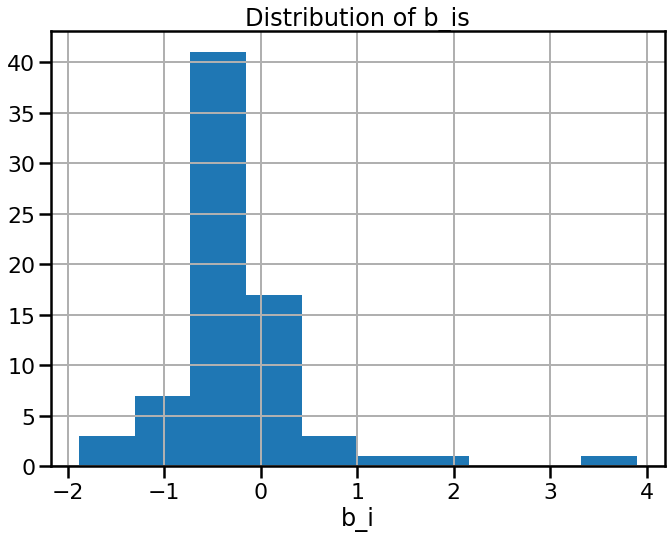

In [50]:
merf.trained_b.hist(bins=10)
plt.xlabel('b_i')
plt.title('Distribution of b_is')

In [51]:
Z_test = np.ones((len(X_test), 1))
clusters_test = test1['group']
y_test = test1['fatalities']

In [52]:
y_hat_test_merf = merf.predict(X_test, Z_test, clusters_test)
assert len(y_hat_valid_merf) == len(y_test)

In [53]:
eval_test_merf=pd.DataFrame({'prediction': y_hat_test_merf, 'target variable': y_test})
print('r2 score of the model: ', r2_score(y_test, y_hat_test_merf)) 
print('mse of the model: ',mean_squared_error(y_test, y_hat_test_merf))
print('rmse of the model: ',np.sqrt(mean_squared_error(y_test, y_hat_test_merf)) )

r2 score of the model:  -0.2636516860847762
mse of the model:  109.91919568154862
rmse of the model:  10.484235579266073


Text(0.5, 1.0, 'Predicted refugee flows and true values (MERF)')

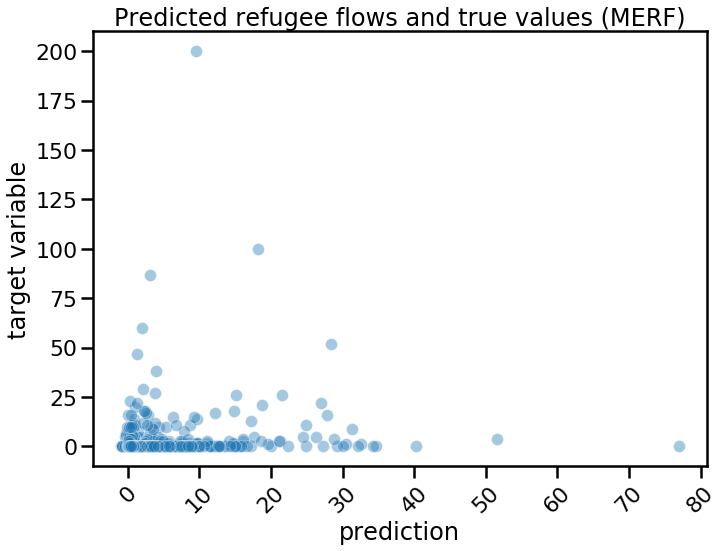

In [54]:
# plot the true value vs prediction
ax = sns.scatterplot(x="prediction", y="target variable", data=eval_test_merf, alpha=0.4 )
plt.xticks(rotation=45)
plt.title('Predicted refugee flows and true values (MERF)')